## Homework 10

#### *DATA 1010*

In [8]:
import Pkg; Pkg.add("DataStructures")
using Random, LinearAlgebra, Statistics, DataStructures,StatsBase
using Distributions, Plots, LaTeXStrings
gr(fontfamily = "Palatino");

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %          ]  75.0 % Resolving package versions...
 Installed TimerOutputs ─ v0.5.2
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [a759f4b9] ↑ TimerOutputs v0.5.1 ⇒ v0.5.2


---

## Problem 1



Consider the XOR classification problem. We have to find a decision boundary separating points labelled in blue and red, shown below:

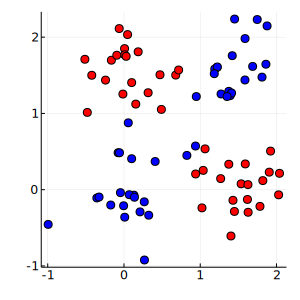

sh: 1: dvipng: not found
dvipng: PNG conversion failed
sh: 1: dvipng: not found
dvipng: PNG conversion failed
sh: 1: dvipng: not found
dvipng: PNG conversion failed
sh: 1: dvipng: not found
dvipng: PNG conversion failed
sh: 1: dvipng: not found
dvipng: PNG conversion failed
sh: 1: dvipng: not found
dvipng: PNG conversion failed
sh: 1: dvipng: not found
dvipng: PNG conversion failed
sh: 1: dvipng: not found
dvipng: PNG conversion failed


In [3]:
Random.seed!(123)

blue_points = [
    rand(MvNormal([1.5; 1.5], [[0.1 0.0]; [0.0 0.1]]), 20)';
    rand(MvNormal([0.0; 0.0], [[0.1 0.0]; [0.0 0.1]]), 20)'
]

red_points = [
    rand(MvNormal([1.5; 0.0], [[0.1 0.0]; [0.0 0.1]]), 20)';
    rand(MvNormal([0.0; 1.5], [[0.1 0.0]; [0.0 0.1]]), 20)'
]

plot(xlabel=L"x_1", ylabel=L"x_2", legend = false, ratio = 1, size = (300, 300))
scatter!(blue_points[:,1], blue_points[:,2], color=:blue)
scatter!(red_points[:,1], red_points[:,2], color=:red)

(a) For each of the following models, determine whether the model is an appropriate choice for solving the XOR classification problem: LDA, QDA, Naive Bayes, Linear SVM, Kernelized SVM, Logistic Regression, Decision Tree. Provide a brief justification for your answer. 

(b) Explore different architectures on [Tensorflow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.40593&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to find the smallest neural network that can accurately classify these points. Write down the weights and biases of each hidden layer as a matrix. Draw a diagram illustrating the architecture you selected and write an expression for the function ($x_1$ and $x_2$) that computes the output of the final layer. 

### Solution to Problem 1

    (a) LDA - **No**, Because the red and blue dots classes cannot be accurately defined by a single MV Normal
        QDA - **No**, Same as above
        Naive Bayes - **Yes**, Totally a good choice.
        Linear SVM - **No**, Since blues are on both sides. Can't cut it with a single planes
        Kernelized SVM - **Yes**, Since on higher dimension, we could pass a plane separating the points, if in that space, the blue/red points get raised along a dimension but not the other. 
        Logistic Regression - **No**, Since the red is on both sides. (Maybe with feature augmentation)
        Decision Tree - **Yes**, Since the screen can be separated into quadrants which can be done with a depth of 2 max.
        
Note. if we pass this through a library, I guess all of this would do a good job by employing some sort of feature augmentation, or the error of fitting a bi-modal distribution to a single MV Normal would not be that bad (considering that the two classes have low covariance)

(b) We can do it with 2 hidden layers. With 3 and 2 neurons respectively. The corresponding weights and biases are:

Layer 1:

$ W_1 = \begin{bmatrix} -1.1 & 1.5 \\ -2.0 & -0.069 \\ 0.0061 & 1.1 \end{bmatrix}$; $B_1 = \begin{bmatrix} 0.16 \\0.7\\0.83 \end{bmatrix}$

Layer 2:

$ W_2 = \begin{bmatrix} -1.8 & 1 & -0.29 \\ -0.63 & -1.9 & 1.2\end{bmatrix}$; $B_2 = \begin{bmatrix} 0 \\0 \end{bmatrix}$

Layer 3: (Prediction)

$ W_3 = \begin{bmatrix} 2.0 & 2.2 \end{bmatrix}$

--- 

## Problem 2

In this exercise we explore the connection between SVM and single-layer perceptron model.

Suppose we have a training dataset D of size $N$: $$ D = \{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \cdots (\mathbf{x}_N, y_N)\}, $$ where $\mathbf{x}_i \in \mathbb{R}^n$, $y_i \in \{+1, -1\}$. Suppose that our points are linearly separable.

Define $\mathbf{w} \in \mathbb{R}^n$ and $b \in \mathbb{R}$. Define $$\Phi(\mathbf{x}, \mathbf{w}, b) = \mathbf{w} \cdot \mathbf{x} + b.$$ 

(a) Find a function $g$ and classification criteria such that $g(\Phi(\mathbf{x}, \mathbf{w}, b))$ and the classification criteria give a logistic regression classifier, an SVM classifier, and a perceptron classifier.

(b) Use the loss functions for perceptron and SVM classifiers to explain why a hard-margin SVM can be viewed as a perceptron with additional penalty terms given a linearly separable classification problem. 

(c) What advantages does the hard-margin SVM have over the single-layer perceptron when it comes to training?

### Solution to Problem 2

(a) For Logistic Regression Classifier:
$$
g(\Phi(x,w,b)) : \frac{1}{1+e^{-\Phi(x,w,b)}}
$$
The classification criteria is $\begin{cases} 
                                +1 \quad \text{if } \sigma(\Phi(x,w,b) > 0.5\\
                                -1 \quad \text{if } \sigma(\Phi(x,w,b) < 0.5
                                \end{cases}$.

SVM Classifier (Hard Margin): 
$$
g(\Phi(x,w,b)) : \Phi(x,w,b)
$$
The classification criteria is $\begin{cases} 
                                +1 \quad \text{if } \Phi(x,w,b) > 0\\
                                -1 \quad \text{if } \Phi(x,w,b) < 0
                                \end{cases}$.


Perceptron Classifier: Same as in SVM Hard Margin Classifier

(b) Let's compare the loss function for both the classifier

$$
\begin{align}
\text{SVM: }& \text{min }|w|^2 + \sum\left[1-y_i\Phi(x,w,b)\right]_+\\
\text{Perceptron: }& \text{min } \sum\left[1-y_i\Phi(x,w,b)\right]_+
\end{align}
$$
Therefore we can see that a SVM classifier find the minimum $|w|^2$ in tandem to minimising missclassification.

(c)Therefore while Perceptron finds a line/plane/hyperplane of separation, SVM in addition finds that line/plane/hyperplane which can center the largest slab that can be fit the separation space.

---

## Problem 3

(a) Consider the coordinates of $n$ points in $\mathbb{R}^p$, organized into an $n\times p$ matrix $A$. Suppose that `U, Σ, V = svd(A .- mean(A, dims=1))`, and explain why `V[:,1:k]'` is the matrix which maps any point in $\mathbb{R}^p$ to its coordinates in the subspace of $\mathbb{R}^p$ spanned by the columns of `V[:,1:k]`. (Note: this one is linear algebra review.)

(b) Plot an image of the *third* principal component for the MNIST dataset. Identify a digit which you think should predominantly have a large or small dot product with this image, and make a scatter plot of which shows the dot product with the first principal component on the $x$-axis and the dot product with the third principal component on the $y$-axis. Check whether your prediction was accurate.

(c) What do you think the 100th principal component might look like, compared to the first few? Display it and check your prediction.

### Solution to Problem 3

In [1]:
using MLDatasets, Images

MNIST.download(i_accept_the_terms_of_use = true)
features, labels = MNIST.traindata(Float64)
A = reshape(features[:],28^2,60_000)'

┌ Info: Downloading
│   source = http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
│   dest = /home/sayan/.julia/datadeps/MNIST/train-labels-idx1-ubyte.gz
│   progress = 1.0
│   time_taken = 0.3 s
│   time_remaining = 0.0 s
│   average_speed = 93.701 KiB/s
│   downloaded = 28.204 KiB
│   remaining = 0 bytes
│   total = 28.204 KiB
└ @ HTTP /home/sayan/.julia/packages/HTTP/hJSsm/src/download.jl:119
┌ Info: Downloading
│   source = http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
│   dest = /home/sayan/.julia/datadeps/MNIST/t10k-labels-idx1-ubyte.gz
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = 4.332 MiB/s
│   downloaded = 4.436 KiB
│   remaining = 0 bytes
│   total = 4.436 KiB
└ @ HTTP /home/sayan/.julia/packages/HTTP/hJSsm/src/download.jl:119
┌ Info: Downloading
│   source = http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
│   dest = /home/sayan/.julia/datadeps/MNIST/t10k-images-idx3-ubyte.gz
│   progress = 1.0
│  

60000×784 Adjoint{Float64,Array{Float64,2}}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [2]:
function imshow(v)
    if any(v .< 0)
        (x -> x > 0 ? RGB(x,0,0) : RGB(0,0,-x)).(reshape(v./maximum(abs.(v)),(28,28))')
    else
        Gray.(reshape(v./maximum(abs.(v)),(28,28))')
    end
end

imshow (generic function with 1 method)

In [3]:
U, Σ, V = svd(A .- mean(A,dims=1));

(a) The thing that is been done here to project a vector on to the span of a list of vectors is essentially the dot product of the vector $P\cdot V[:,1:k] = V[:,1:k]'P$

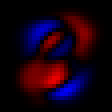

In [9]:
imshow(V[:,3])

(b) Looks like 8. The red looks kind of loopy.

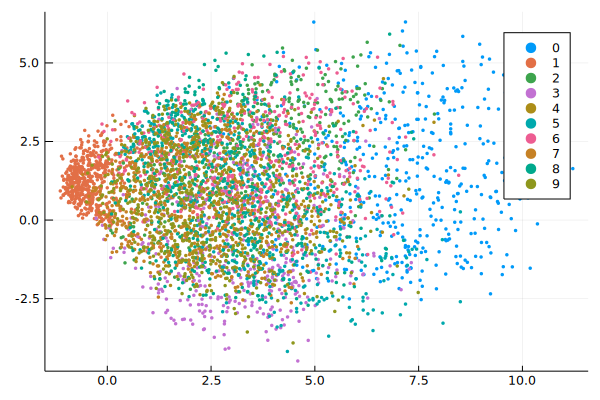

In [10]:
n = 5000
scatter(A[1:n,:]*V[:,1],
        A[1:n,:]*V[:,3],
        group=labels[1:n],
        markersize=2,
        markerstrokewidth=0)

Let's find the relative value of the dot products of all the different points corresponding to a particular number, the value of which represent the color on the histogram. 

In [6]:
function find_score(A,num)
    n = 10000
    set_num = [i for i in 1:n if labels[i] == num ] 
    A_subset = A[set_num,:] 
    return var(A_subset*V[:,3])
end
                

find_score (generic function with 1 method)

In [7]:
score_dict = Dict()
for i in 0:9
    score_dict["$(i)"] = find_score(A,i)
end
sort(collect(score_dict), by=x->x[2], rev = true)

10-element Array{Pair{Any,Any},1}:
 "0" => 4.16536 
 "5" => 4.15339 
 "8" => 3.78399 
 "3" => 3.1047  
 "9" => 2.74826 
 "4" => 2.42081 
 "2" => 2.39811 
 "7" => 1.99851 
 "6" => 1.8802  
 "1" => 0.625165

Wow, 8 is third in rank. It is more a 0 or a 5.

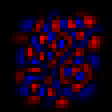

In [13]:
imshow(V[:,100])

NO Idea, what this looks like...does look an eigth though (as it should be or a 2 or 4).

## Problem 4

(a) PCA does not take any measures to separate points from different classes. Come up with an example of a two-class dataset in $\mathbb{R}^2$ with the property that the classes are separable in the original space, but they get all mixed up when projected to the first principal component. Please illustrate your example by generating points and making a scatter plot.

(b) What about t-SNE? Use the `TSne` package to reduce your dataset from 2 dimensions to 1, and plot the results to see how it compares to PCA.

### Solution to Problem 4

(a)

In [272]:
function genXY(n)
    x = rand(Normal(-3,3),n)
    y = rand(Normal(-0.5,1),n)
    labels = [(y[i] < 0.25 ? 1 : -1) for i in 1:n]
    return x,y,labels
end

genXY (generic function with 1 method)

In [273]:
x, y, labels = genXY(500);

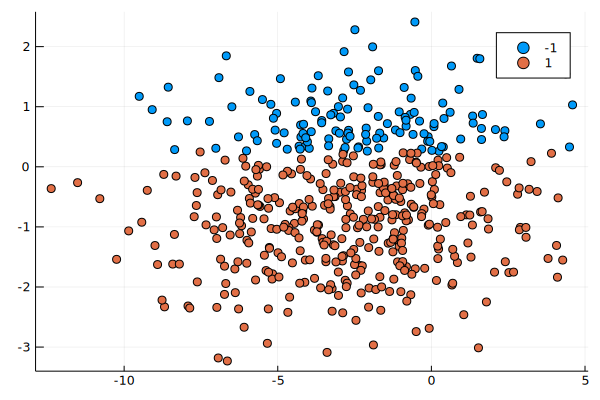

In [274]:
scatter(x,y,group=labels)

In [326]:
#countmap(y)
X = [x y]
U_x, Σ_x, V_x = svd(X .- mean(X,dims=1));

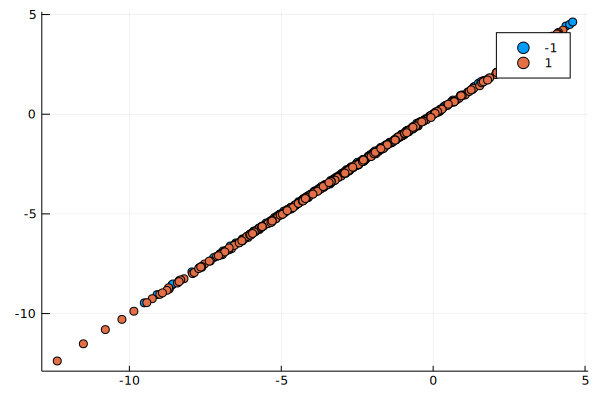

In [327]:
scatter(x,X*V_x[:,1],group=labels)

As you see, the points are mized up, it's because in that direction it is almost uqual to x. It captures all the variance and hence has no predictive power. Just to check for the other component.

(b) Using T-Sne

In [339]:
using TSne, Random


Y = tsne(X')

2×2 Array{Float64,2}:
 -1835.32  -1283.23
  1835.32   1283.23

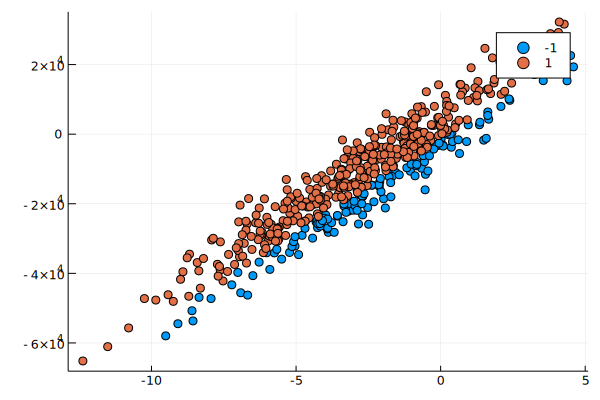

In [328]:
scatter(x,X*Y[:,1],group=labels)

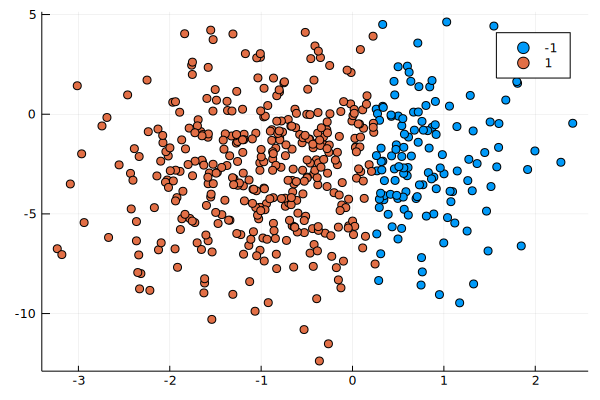

In [329]:
scatter(y,X*V_x[:,1],group=labels)

Thus we can see T-Sne does a much better job.

---

## Problem 5

A weather station in Providence classifies each day's weather as "good", "fair", or "poor" according to meteorological data. The following table shows the probabilistic relationship between weather on the current day and the probability of the weather expected on next day conditioned on the type of current day.

current\next | good | fair | poor
------------| -----|-----| ----- 
good | 0.60 | 0.30 | 0.10
fair | 0.50 | 0.25 | 0.25
poor | 0.20 | 0.40 | 0.40

(a) Determine the probability that the weather will be "poor" exactly 3 days after a "good" weather day.

(b) Over a long period of time, what percentage of days can we expect to have "good" weather?

### Solution to Problem 5

(a)

In [42]:
pmatrix = [0.6 0.3 0.1; 0.5 0.25 0.25; 0.2 0.4 0.4]

prior = [1; 0; 0]
result = prior
for i in 1:3
    result = pmatrix'*result
end
result
print("Probability that weather will be poor exactly 3 days after a good day: ")
print(round(result[1];digits=3))

Probability that weather will be poor exactly 3 days after a good day: 0.501

In [32]:
result = prior
for i in 1:1000000
    result = pmatrix'*result
end
result

3-element Array{Float64,1}:
 0.4861111111111112 
 0.30555555555555564
 0.2083333333333334 

| Weather 	| P 	|
|---------	|-------	|
| Good 	| 0.486 	|
| Fair 	| 0.305 	|
| Poor 	| 0.208 	|

---

## Problem 6

Consider the state space $X = \{0, 1\}^n$ of binary strings having length $n$. Define $p(y, x) = 1/n$ if $y$ differs from $x$ in exactly one bit, and $p(y, x) = 0$ otherwise. 

Suppose we desire an equilibrium distribution $\pi$ for which $\pi(x)$ is proportional to the number of ones that occur in vector $\mathbf{x}$. For example, in the long run, a random walk should visit a string having five 1’s five times as often as it visits a string having only a single 1. 

Provide a general formula for the acceptance ratio $\alpha(x, y)$ that would be used if we were to obtain the desired equilibrium distribution using the Metropolis-Hastings algorithm.

---

## Problem 7

In this exercise, we will develop a MCMC sampler for linear regression. First, we generate some data, assuming the true regression function:

$$ r(x) = -x + 0.2 $$

In [99]:
Random.seed!(42)
x = rand(Uniform(0, 100), 1000)
y_mean = -x .+ 0.2
y = y_mean + rand(Normal(0, 1.5), 1000);

Use MCMC sampling to fit a linear regression model to predict $y$ given $x$. Use $\mathcal{N}(0, 100)$ prior for the intercept and the slope and $\operatorname{Inv-Gamma}(0.001, 0.001)$ prior for the standard deviation. Generate 10,000 samples for each of the model parameters.

$\beta_0 = \mathcal{N}(\mu_0,1/\tau_0)$

$\beta_1 = \mathcal{N}(\mu_1,1/\tau_1)$

$\tau = \Gamma(\alpha,\beta)$

In [100]:
function sampleβ0(y,x,β1,τ,μ0,τ0)
    N = length(y)
    precision = τ0 + τ * N
    mean = τ0 * μ0 + τ * sum(y .- β1 .* x)
    mean /= precision
    return rand(Normal(mean,1 / sqrt(precision)))
    #return np.random.normal(mean, 1 / np.sqrt(precision))
    
end

function sampleβ1(y, x, β0, τ, μ1, τ1)
    N = length(y)
    precision = τ1 + τ * sum(x .* x)
    mean = τ1 * μ1 + τ * sum( (y .- β0) .* x)
    mean /= precision
    
    return rand(Normal(mean,1 / sqrt(precision)))
end


function sampleτ(y, x, β0, β1, α, β)
    N = length(y)
    α_new = α + N / 2
    resid = y .- β0 .- β1 .* x
    β_new = β + sum(resid .* resid) / 2
    
    return rand(Gamma(α_new, 1 / β_new))
end

function gibbs(y,x,iters,τ0 = 0.01,τ1 = 0.01,μ0 = 0.0,μ1 = 1.0,α = 0.001,β = 0.001,τ = 2.0,β0 = 0,β1 = 0)
    trace = zeros(iters, 3)
    for it in 1:iters
        β0 = sampleβ0(y, x, β1, τ, μ0, τ0)
        β1 = sampleβ1(y, x, β0, τ, μ1, τ1)
        τ = sampleτ(y, x, β0, β1, α, β)
        trace[it,:] = [β0 β1 τ]
    end
    
    return trace
end

gibbs (generic function with 10 methods)

In [101]:
iters = 100_000
trace = gibbs(y,x,iters);

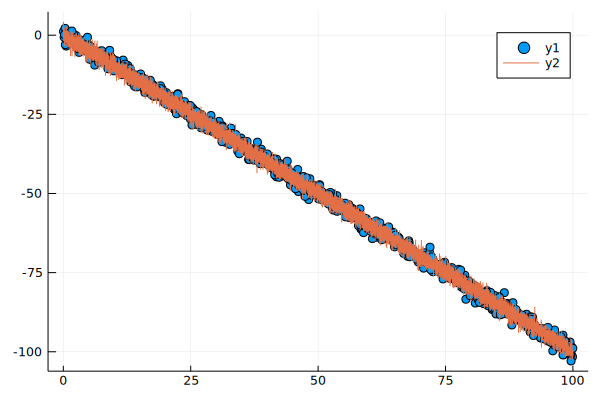

In [102]:
scatter(x, y)
plot!(0:0.01:100, x-> trace[end,:][1] + trace[end,:][2]*x + rand(Normal(0, 1/sqrt(trace[end,:][3]))))

Thus we correctly converge to the correct value of slope, intercept and the standard deviation of the error. 

In [113]:
print("Predicted Regression Function is $(trace[end:end,:][1]) $(trace[end,:][2])x")
trace[end-5:end,:]

Predicted Regression Function is 0.19658486043944323 -1.0007854769957574x

6×3 Array{Float64,2}:
 0.24344   -0.999931  0.410234
 0.216143  -1.0007    0.469864
 0.229941  -1.00129   0.455287
 0.235452  -1.00096   0.463632
 0.266262  -1.00163   0.437639
 0.196585  -1.00079   0.449084

---

## Problem 8

For convenience, define the pdf for a normal distribution as
$$f(x; \mu, \eta) = \left( \frac{\eta}{2\pi} \right)^{\frac{1}{2}} \text{exp}\left(  -\frac{1}{2}\eta(x - \mu)^2 \right).$$

In other words, $\eta$ is a place holder for $\frac{1}{\sigma^2}$. We call $\eta$ the **precision** of a normal distribution.

Suppose we have a prior distribution for the unknown mean of a normal distribution $ N(\mu, \eta_0 ^{-1})$. The prior distribution for this mean $f_M(\mu)$ is given by $N(\mu_0, \eta_{p}^{-1})$. In this problem we will show computationally that the posterior mean $\mu_{\text{post}}$ is weighted sum of the sample mean and the prior mean. In the process, we will derive the posterior variance $\eta_{\text{post}}$ and observe its form.

1. Show that the posterior distribution is proportional to the following expression: 

$$ f_{M; X}(\mu; x) \propto \text{exp}\left( -\frac 12 [n\eta_0(\bar{x} - \mu)^2 + \eta_p(\mu - \mu_0^2)] \right).$$

2. Re-arrange terms to format the expression in the form of a normal distribution. You will find the mean and standard deviation of the posterior distribution:

$$ \mu_{\text{post}} = \frac{n\eta_0\bar{x} + \mu_0 \eta_p}{n \eta_0 + \eta_p}$$ and

$$ \eta_{\text{post}} = n\eta_0 + \eta_p$$

3. Re-write the posterior mean as a weighted sum of $\bar{x}$ and $\mu_0$. Explain how these results agree with the observation that posterior parameters are functions of both the data and the prior distribution.

*Hint:* Without proof, you may use the identity: $\sum_{i=1}^n(x_i - \mu)^2 = \sum_{i=1}^n(x_i - \bar{x})^2 + n(\mu - \bar{x})^2$ in your calculations.

### Solution to Problem 8


$$
\begin{align}
f(\mu) &= \mathcal{N}(\mu,\sigma_p^2)\\
f(x|\mu) &= \mathcal{N}(\mu,\sigma_o^2)\\
\therefore f(\mu|x) &\propto f(\mu)f(x_1|\mu)f(x_2|\mu)f(x_3|\mu)\cdots f(x_n|\mu)\\
&\propto \frac{1}{\sqrt{2\pi\sigma_p^2}}\exp\left\{-\frac{(\mu - \mu_o)^2}{2\sigma_p^2}\right\}\prod\frac{1}{\sqrt{2\pi\sigma_o^2}}\exp\left\{-\frac{(x_i - \mu)^2}{2\sigma_o^2}\right\}\\
&\text{considering the coefficient is constant, so its $\propto$ the exponential}\\
&\propto \exp\left(-\frac{1}{2}[\eta_p(\mu - \mu_o)^2 + \eta_o\sum_{i=1}^n (x_i - \mu)^2]\right)\\
\text{since } \sum_{i=1}^n(x_i - \mu)^2 &= \sum_{i=1}^n(x_i - \bar{x})^2 + n(\mu - \bar{x})^2\\
&\propto \exp\left(-\frac{1}{2}[\eta_p(\mu - \mu_o)^2 + \eta_o\sum_{i=1}^n (x_i - \bar{x})^2 + n(\mu - \bar{x})^2]\right)\\
\text{since } \sum_{i=1}^n (x_i - \bar{x})^2 &\text{ is a constant}\\
&\propto \exp\left(-\frac{1}{2}[\eta_p(\mu - \mu_o)^2 +  n\eta_o(\bar{x} - \mu)^2]\right)
\end{align}
$$




Going forward with the earlier equation though

$$
\begin{align}
f(\mu|x) &\propto \exp\left(\frac{-\mu^2(\sigma_o^2 + n\sigma_p^2) + 2\mu(\mu_p\sigma_o^2 + \sigma_p^2x_1 + \cdots \sigma_p^2x_n) - (\mu_p\sigma_o^2 + \sigma_p^2x_1^2 + \cdots \sigma_p^2x_n^2}{2\sigma_o^2\sigma_p^2} \right)\\
&\propto \exp\left(\frac{-\mu^2 + 2\mu\frac{\mu_p\sigma_o^2 + \sum_{i=1}^n \sigma_p^2x_i}{\sigma_o^2 + n\sigma_p^2} + \left(\frac{\mu_p\sigma_o^2 + \sum_{i=1}^n \sigma_p^2x_i}{\sigma_o^2 + n\sigma_p^2}\right)^2}{2\frac{\sigma_p^2\sigma_o}{\sigma_o^2 + n\sigma_p^2}}\right)\times\text{ (const) }\\
&\propto \exp\left(-\frac{\left(\mu - \frac{\mu_p\sigma_o^2 + \sum_{i=1}^n \sigma_p^2x_i}{\sigma_o^2 + n\sigma_p^2}\right)^2}{2\frac{\sigma_p^2\sigma_o}{\sigma_o^2 + n\sigma_p^2}}\right)
\end{align}
$$

This is just a gaussian with $\mathcal{N}(\mu_{\text{post}},\mu^2_{\text{post}})$, where

$$
\begin{align}
\mu_{\text{post}} &= \frac{\mu_p\sigma_o^2 + \sum_{i=1}^n \sigma_p^2x_i}{\sigma_o^2 + n\sigma_p^2}\\
&= \frac{\mu_o\eta_p + \sum_{i=1}x_i\eta_o}{n\eta_o + \eta_p}\\
&= \frac{\mu_o\eta_p + n\bar{x}\eta_o}{n\eta_o + \eta_p}
\end{align}
$$

and

$$
\begin{align}
\sigma_{\text{post}} &= \frac{\sigma_p^2\sigma_o}{\sigma_o^2 + n\sigma_p^2}\\
&= n\eta_0 + \eta_p
\end{align}
$$

Thus we can see the posterior mean $\mu_{\text{post}} = \frac{n\eta_o}{n\eta_0 + \eta_p}\bar{x} + \frac{\eta_p}{n\eta_0 + \eta_p}\mu_o$

Hence we can tell that posterior parameters are functions of both the data $x_i$'s and the prior distribution ($\mu_o)$ as weighted sums as shown above.

